In [1]:
%load_ext sql

In [2]:
%%sql sqlite:///foo1.db
CREATE TABLE writer (first_name,last_name,year_of_death);

Done.


[]

In [4]:
%%sql
INSERT INTO writer VALUES('William','Shakespeare',1616);
INSERT INTO writer VALUES('Bertold','Brecht',1956);
INSERT INTO writer VALUES('Wes','Shakespeare',1616);

 * sqlite:///foo1.db
1 rows affected.
1 rows affected.
1 rows affected.


[]

In [8]:
%%sql
SELECT * FROM writer

 * sqlite:///foo1.db
Done.


first_name,last_name,year_of_death
William,Shakespeare,1616
Bertold,Brecht,1956
Wes,Shakespeare,1616


In [9]:
%%sql
select first_name,last_name from writer

 * sqlite:///foo1.db
Done.


first_name,last_name
William,Shakespeare
Bertold,Brecht
Wes,Shakespeare


In [15]:
%%sql
select first_name,last_name from writer where year_of_death >1616;

 * sqlite:///foo1.db
Done.


first_name,last_name
Bertold,Brecht


In [16]:
%%sql
select first_name,last_name from writer where last_name is 'Shakespeare';

 * sqlite:///foo1.db
Done.


first_name,last_name
William,Shakespeare
Wes,Shakespeare


In [17]:
%%sql
select first_name as Name,last_name as Surname from writer;

 * sqlite:///foo1.db
Done.


Name,Surname
William,Shakespeare
Bertold,Brecht
Wes,Shakespeare


In [18]:
%%sql
select * from writer;

 * sqlite:///foo1.db
Done.


first_name,last_name,year_of_death
William,Shakespeare,1616
Bertold,Brecht,1956
Wes,Shakespeare,1616


In [20]:
%%sql
select COUNT(first_name) from writer;

 * sqlite:///foo1.db
Done.


COUNT(first_name)
3


In [21]:
%%sql
select COUNT(first_name) from writer where year_of_death between 1900 and 2000;

 * sqlite:///foo1.db
Done.


COUNT(first_name)
1


In [24]:
result = %sql select * from writer where year_of_death >1900

 * sqlite:///foo1.db
Done.


In [25]:
result

first_name,last_name,year_of_death
Bertold,Brecht,1956


In [26]:
type(result)

sql.run.ResultSet

In [27]:
dataframe = result.DataFrame()

In [28]:
type(dataframe)

pandas.core.frame.DataFrame

In [29]:
dataframe

,first_name,last_name,year_of_death
0,Bertold,Brecht,1956


In [30]:
%matplotlib inline
import seaborn as sns

<BarContainer object of 1 artists>

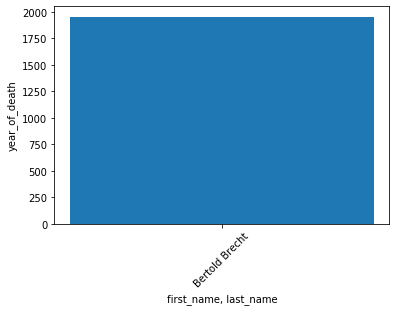

In [31]:
result.bar()

In [35]:
%%sql
select SUM(year_of_death) from writer;

 * sqlite:///foo1.db
Done.


SUM(year_of_death)
5188


In [36]:
%%sql
select AVG(year_of_death) from writer;

 * sqlite:///foo1.db
Done.


AVG(year_of_death)
1729.3333333333333


In [37]:
%%sql 
UPDATE writer SET year_of_death = 2020 WHERE first_name = "William"

 * sqlite:///foo1.db
1 rows affected.


[]

In [38]:
%%sql
select * from writer;


 * sqlite:///foo1.db
Done.


first_name,last_name,year_of_death
William,Shakespeare,2020
Bertold,Brecht,1956
Wes,Shakespeare,1616


In [39]:
%%sql
DELETE FROM writer where first_name = "William"

 * sqlite:///foo1.db
1 rows affected.


[]

In [40]:
%%sql
select * from writer;

 * sqlite:///foo1.db
Done.


first_name,last_name,year_of_death
Bertold,Brecht,1956
Wes,Shakespeare,1616


In [41]:
%%sql
insert into writer values("Azhad","Ghufran",Null)

 * sqlite:///foo1.db
1 rows affected.


[]

In [42]:
%%sql
insert into writer (first_name,last_name) values("Shabaz","Alam");

 * sqlite:///foo1.db
1 rows affected.


[]

In [43]:
%%sql
select * from writer;

 * sqlite:///foo1.db
Done.


first_name,last_name,year_of_death
Bertold,Brecht,1956
Wes,Shakespeare,1616
Azhad,Ghufran,None
Shabaz,Alam,None


In [44]:
from sqlalchemy import create_engine

In [45]:
engine = create_engine('sqlite:///:memory:')

In [47]:
from sqlalchemy import *
metadata = MetaData()

c1 = Column('model',String)
c2 = Column('registration',String)
c3 = Column('odometer',Integer)
vehicles_table = Table('vehicles',metadata,c1,c2,c3)

In [48]:
vehicles_table

Table('vehicles', MetaData(bind=None), Column('model', String(), table=<vehicles>), Column('registration', String(), table=<vehicles>), Column('odometer', Integer(), table=<vehicles>), schema=None)

In [49]:
vehicles_table.create(engine)

In [50]:
ins = vehicles_table.insert()

In [51]:
print(ins)

INSERT INTO vehicles (model, registration, odometer) VALUES (:model, :registration, :odometer)


In [52]:
ins = ins.values({"model":"audi"})

In [54]:
vehicles_table

Table('vehicles', MetaData(bind=None), Column('model', String(), table=<vehicles>), Column('registration', String(), table=<vehicles>), Column('odometer', Integer(), table=<vehicles>), schema=None)

In [55]:
print(ins)

INSERT INTO vehicles (model) VALUES (:model)


In [ ]:
ins = 